In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Data_Laba3\\Automobile_data.csv')
df.info()
# Must Be
# normalized-losses = int64
# bore = float64
# stroke = float64
# horsepower = int64
# peak-rpm = int64
# price = int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [2]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df1 = df[["make", "normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price", "num-of-doors",]]
#df1.describe(include="all")
df1 = df1.replace('?', np.nan)
df = df.replace('?', np.nan)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   make               205 non-null    object
 1   normalized-losses  164 non-null    object
 2   bore               201 non-null    object
 3   stroke             201 non-null    object
 4   horsepower         203 non-null    object
 5   peak-rpm           203 non-null    object
 6   price              201 non-null    object
 7   num-of-doors       203 non-null    object
dtypes: object(8)
memory usage: 12.9+ KB


In [4]:
# Таблиця в якій вказується к-сть NaN значень для кожної групи автомоблів кожного стовпця
def count_nan(row):
    return row.isna().sum()
df2 = df1.copy()
df2['Null_Values'] = df2.apply(count_nan, axis=1)
grouped = df2.groupby('make')
result = grouped.agg({
    'make': 'count', 
    'Null_Values': 'sum', 
    'normalized-losses': lambda x: x.isna().sum(),  
    'bore': lambda x: x.isna().sum(),  
    'stroke': lambda x: x.isna().sum(),  
    'horsepower': lambda x: x.isna().sum(),  
    'peak-rpm': lambda x: x.isna().sum(),  
    'price': lambda x: x.isna().sum(),  
    'num-of-doors': lambda x: x.isna().sum()  
}).rename(columns={'make': 'Total_Rows'})
result = result[result['Null_Values'] > 0].sort_values(by='Null_Values', ascending=False)
result

,Total_Rows,Null_Values,normalized-losses,bore,stroke,horsepower,peak-rpm,price,num-of-doors
make,,,,,,,,,
mazda,17,11,2,4,4,0,0,0,1
isuzu,4,6,4,0,0,0,0,2,0
renault,2,6,2,0,0,2,2,0,0
porsche,5,5,4,0,0,0,0,1,0
audi,7,4,3,0,0,0,0,1,0
bmw,8,4,4,0,0,0,0,0,0
peugot,11,4,4,0,0,0,0,0,0
volkswagen,12,4,4,0,0,0,0,0,0
alfa-romero,3,3,3,0,0,0,0,0,0


In [5]:
df1[df1['make'] == 'mazda'].head(17)

,make,normalized-losses,bore,stroke,horsepower,peak-rpm,price,num-of-doors
50,mazda,104,3.03,3.15,68,5000,5195,two
51,mazda,104,3.03,3.15,68,5000,6095,two
52,mazda,104,3.03,3.15,68,5000,6795,two
53,mazda,113,3.03,3.15,68,5000,6695,four
54,mazda,113,3.08,3.15,68,5000,7395,four
55,mazda,150,NaN,NaN,101,6000,10945,two
56,mazda,150,NaN,NaN,101,6000,11845,two
57,mazda,150,NaN,NaN,101,6000,13645,two
58,mazda,150,NaN,NaN,135,6000,15645,two
59,mazda,129,3.39,3.39,84,4800,8845,two


In [6]:
# Робимо заміни NaN значень
df.loc[63, 'num-of-doors'] = 'four'
df.loc[55, 'bore'] = 3.18
df.loc[55, 'stroke'] = 3.15
df.loc[56, 'bore'] = 3.18
df.loc[56, 'stroke'] = 3.15
df.loc[57, 'bore'] = 3.18
df.loc[57, 'stroke'] = 3.15
df.loc[58, 'bore'] = 3.22
df.loc[58, 'stroke'] = 3.15

In [7]:
df1[df1['make'] == 'dodge'].head(9)

,make,normalized-losses,bore,stroke,horsepower,peak-rpm,price,num-of-doors
21,dodge,118,2.97,3.23,68,5500,5572,two
22,dodge,118,2.97,3.23,68,5500,6377,two
23,dodge,118,3.03,3.39,102,5500,7957,two
24,dodge,148,2.97,3.23,68,5500,6229,four
25,dodge,148,2.97,3.23,68,5500,6692,four
26,dodge,148,2.97,3.23,68,5500,7609,four
27,dodge,148,3.03,3.39,102,5500,8558,NaN
28,dodge,110,3.34,3.46,88,5000,8921,four
29,dodge,145,3.6,3.9,145,5000,12964,two


In [8]:
# Робимо заміни NaN значень
df.loc[27, 'num-of-doors'] = 'four'

In [9]:
df1[df1['make'] == 'isuzu'].head(4)

,make,normalized-losses,bore,stroke,horsepower,peak-rpm,price,num-of-doors
43,isuzu,NaN,3.31,3.23,78,4800,6785,four
44,isuzu,NaN,3.03,3.11,70,5400,NaN,two
45,isuzu,NaN,3.03,3.11,70,5400,NaN,four
46,isuzu,NaN,3.43,3.23,90,5000,11048,two


In [10]:
# Робимо заміни NaN значень
df.loc[44, 'price'] = 6920
df.loc[45, 'price'] = 7115

In [11]:
df1[df1['make'] == 'porsche'].head(5)

,make,normalized-losses,bore,stroke,horsepower,peak-rpm,price,num-of-doors
125,porsche,186,3.94,3.11,143,5500,22018,two
126,porsche,NaN,3.74,2.9,207,5900,32528,two
127,porsche,NaN,3.74,2.9,207,5900,34028,two
128,porsche,NaN,3.74,2.9,207,5900,37028,two
129,porsche,NaN,3.94,3.11,288,5750,NaN,two


In [12]:
# Робимо заміни NaN значень
df.loc[129, 'price'] = 42315

In [13]:
df1[df1['make'] == 'audi'].head(7)

,make,normalized-losses,bore,stroke,horsepower,peak-rpm,price,num-of-doors
3,audi,164,3.19,3.4,102,5500,13950,four
4,audi,164,3.19,3.4,115,5500,17450,four
5,audi,NaN,3.19,3.4,110,5500,15250,two
6,audi,158,3.19,3.4,110,5500,17710,four
7,audi,NaN,3.19,3.4,110,5500,18920,four
8,audi,158,3.13,3.4,140,5500,23875,four
9,audi,NaN,3.13,3.4,160,5500,NaN,two


In [14]:
# Робимо заміни NaN значень
df.loc[9, 'price'] = 24990

In [15]:
df1[df1['make'] == 'renault'].head(2)

,make,normalized-losses,bore,stroke,horsepower,peak-rpm,price,num-of-doors
130,renault,NaN,3.46,3.9,NaN,NaN,9295,four
131,renault,NaN,3.46,3.9,NaN,NaN,9895,two


In [16]:
# Робимо заміни NaN значень
df.loc[130, 'peak-rpm'] = 5400
df.loc[130, 'horsepower'] = 110
df.loc[131, 'peak-rpm'] = 5500
df.loc[131, 'horsepower'] = 114

In [17]:
# Робимо заміни NaN значень на 0
df['normalized-losses'] = df['normalized-losses'].fillna(0)
# Змінюємо тип стовців з object на int або float
df['normalized-losses'] = df['normalized-losses'].astype('int64')
df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')
df['horsepower'] = df['horsepower'].astype('int64')
df['peak-rpm'] = df['peak-rpm'].astype('int64')
df['price'] = df['price'].astype('int64')
# Заміна 0 значень середнім значенням
mean = df['normalized-losses'].mean()
df['normalized-losses'] = df['normalized-losses'].replace(0, mean)
# Заміна на число 'num-of-cylinders': eight, five, four, six, three, twelve, two
df.loc[df['num-of-cylinders'] == 'eight', 'num-of-cylinders'] = 8
df.loc[df['num-of-cylinders'] == 'five', 'num-of-cylinders'] = 5
df.loc[df['num-of-cylinders'] == 'four', 'num-of-cylinders'] = 4
df.loc[df['num-of-cylinders'] == 'six', 'num-of-cylinders'] = 6
df.loc[df['num-of-cylinders'] == 'three', 'num-of-cylinders'] = 3
df.loc[df['num-of-cylinders'] == 'twelve', 'num-of-cylinders'] = 12
df.loc[df['num-of-cylinders'] == 'two', 'num-of-cylinders'] = 2
# Заміна на число 'num-of-doors': four, two
df.loc[df['num-of-doors'] == 'four', 'num-of-doors'] = 4
df.loc[df['num-of-doors'] == 'two', 'num-of-doors'] = 2
# Змінюємо тип стовців з object на int
df['num-of-cylinders'] = df['num-of-cylinders'].astype('int64')
df['num-of-doors'] = df['num-of-doors'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [18]:
df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,117.120000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.327024,3.253366,10.142537,104.331707,5128.536585,25.219512,30.751220,13346.209756
std,1.245307,33.157365,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.271547,0.313937,3.972040,39.527072,478.076010,6.542142,6.886443,8191.923782
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,97.600000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,103.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
df['make'].value_counts(normalize=False)

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [20]:
df['fuel-type'].value_counts(normalize=True)

gas       0.902439
diesel    0.097561
Name: fuel-type, dtype: float64

In [21]:
df['engine-location'].value_counts(normalize=True)

front    0.985366
rear     0.014634
Name: engine-location, dtype: float64

In [22]:
df['engine-type'].value_counts(normalize=True)

ohc      0.721951
ohcf     0.073171
ohcv     0.063415
dohc     0.058537
l        0.058537
rotor    0.019512
dohcv    0.004878
Name: engine-type, dtype: float64

In [23]:
df['aspiration'].value_counts(normalize=True)

std      0.819512
turbo    0.180488
Name: aspiration, dtype: float64

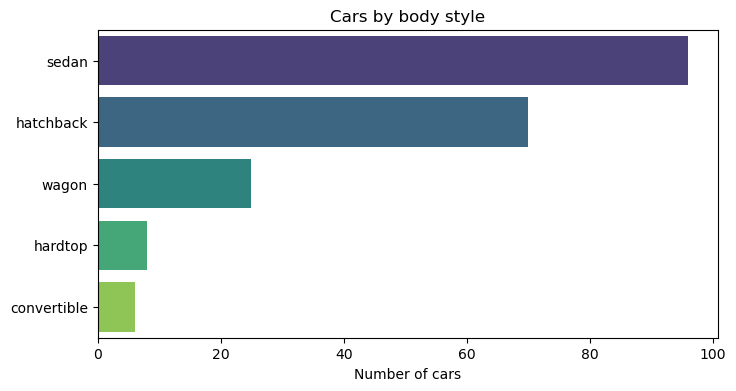

In [24]:
df_plot = df['body-style'].value_counts().reset_index(name='Count')
df_plot = df_plot.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x='Count', y='index', hue = 'index', data=df_plot, palette='viridis')
plt.title('Сars by body style')
plt.ylabel('')
plt.xlabel('Number of cars')
plt.show()

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

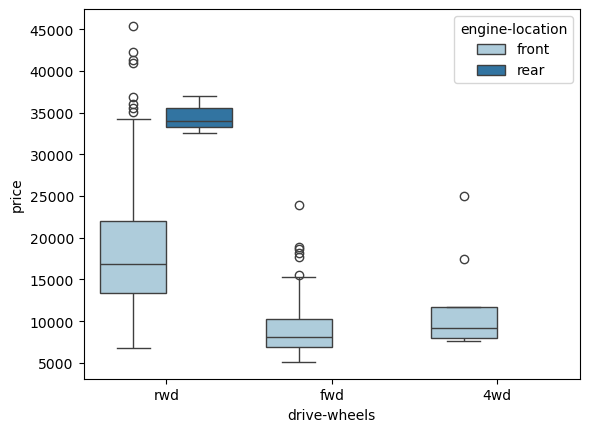

In [25]:
sns.boxplot(x="drive-wheels", y="price", hue = "engine-location", data=df, palette='Paired')

In [26]:
#top_brands = df['make'].value_counts().head(10).index
#top_brands_data = df[df['make'].isin(top_brands)]
body_style_stats = df.groupby('body-style').agg({
    'price': 'mean',
    'horsepower': 'mean',
    'city-mpg': 'mean',
    'highway-mpg': 'mean',
    'symboling': 'mean',
    'fuel-type': lambda x: x.value_counts().idxmax(),
    'engine-type': lambda x: x.value_counts().idxmax(),
    'num-of-doors': lambda x: x.value_counts().idxmax(),
    'engine-location': lambda x: x.value_counts().idxmax()
})
body_style_stats

,price,horsepower,city-mpg,highway-mpg,symboling,fuel-type,engine-type,num-of-doors,engine-location
body-style,,,,,,,,,
convertible,21890.500000,131.666667,20.500000,26.000000,2.833333,gas,dohc,2,front
hardtop,22208.500000,142.250000,21.625000,27.250000,1.875000,gas,ohc,2,front
hatchback,10634.442857,101.514286,26.314286,32.171429,1.585714,gas,ohc,2,front
sedan,14304.708333,103.104167,25.322917,30.833333,0.333333,gas,ohc,4,front
wagon,12371.960000,98.240000,24.040000,28.720000,-0.160000,gas,ohc,4,front


In [27]:
# Розподіл топ-14 марок авто за типом кузова і ......
# Середні та найпопулярніші значення для ключових ознак. Відсортовані за вартістю
top_brands = df['make'].value_counts().head(14).index
result_df = pd.DataFrame()
for brand in top_brands:
    brand_data = df[df['make'] == brand]    
    top_styles = brand_data['body-style'].value_counts().head(3).index    
    for style in top_styles:        
        style_data = brand_data[brand_data['body-style'] == style]       
        avg_price = style_data['price'].mean()
        avg_horsepower = style_data['horsepower'].mean()
        avg_highway_mpg = style_data['highway-mpg'].mean()
        risk = style_data['symboling'].mean()
        fuel_type = style_data['fuel-type'].mode().iloc[0]
        engine_type = style_data['engine-type'].mode().iloc[0]
        doors = style_data['num-of-doors'].mode().iloc[0]
        engine_location = style_data['engine-location'].mode().iloc[0]
        drive_wheels = style_data['drive-wheels'].mode().iloc[0]
        aspiration = style_data['aspiration'].mode().iloc[0]
        result_row = pd.DataFrame({
            'make': [brand],
            'body-style': [style],
            'price': [avg_price],
            'horsepower': [avg_horsepower],
            'highway-mpg': [avg_highway_mpg],
            'symboling': [risk],
            'fuel-type': [fuel_type],
            'engine-type': [engine_type],
            'doors': [doors],
            'engine-location': [engine_location],
            'drive-wheels': [drive_wheels],
            'aspiration': [aspiration]
        })       
        result_df = pd.concat([result_df, result_row], ignore_index=True).sort_values(by='price', ascending=False)
        result_df['price'] = result_df['price'].round(1)
        result_df['horsepower'] = result_df['horsepower'].round(1)
        result_df['highway-mpg'] = result_df['highway-mpg'].round(1)
        result_df['symboling'] = result_df['symboling'].round(0)
result_df

,make,body-style,price,horsepower,highway-mpg,symboling,fuel-type,engine-type,doors,engine-location,drive-wheels,aspiration
0,mercedes-benz,hardtop,36788.0,153.5,20.5,0.0,diesel,ohc,2,front,rwd,std
1,mercedes-benz,sedan,33074.0,146.2,21.0,-1.0,diesel,ohc,4,front,rwd,std
2,mercedes-benz,wagon,28248.0,123.0,25.0,-1.0,diesel,ohc,4,front,rwd,turbo
3,bmw,sedan,26118.8,138.9,25.4,0.0,gas,ohc,4,front,rwd,std
4,audi,hatchback,24990.0,160.0,22.0,0.0,gas,ohc,2,front,4wd,turbo
5,audi,wagon,18920.0,110.0,25.0,1.0,gas,ohc,4,front,fwd,std
6,volvo,sedan,18726.9,127.2,25.8,-1.0,gas,ohc,4,front,rwd,std
7,audi,sedan,17647.0,115.4,24.4,2.0,gas,ohc,4,front,fwd,std
8,volvo,wagon,16293.3,130.0,26.0,-1.0,gas,ohc,4,front,rwd,std
9,peugot,sedan,15758.6,102.3,27.9,0.0,gas,l,4,front,rwd,turbo


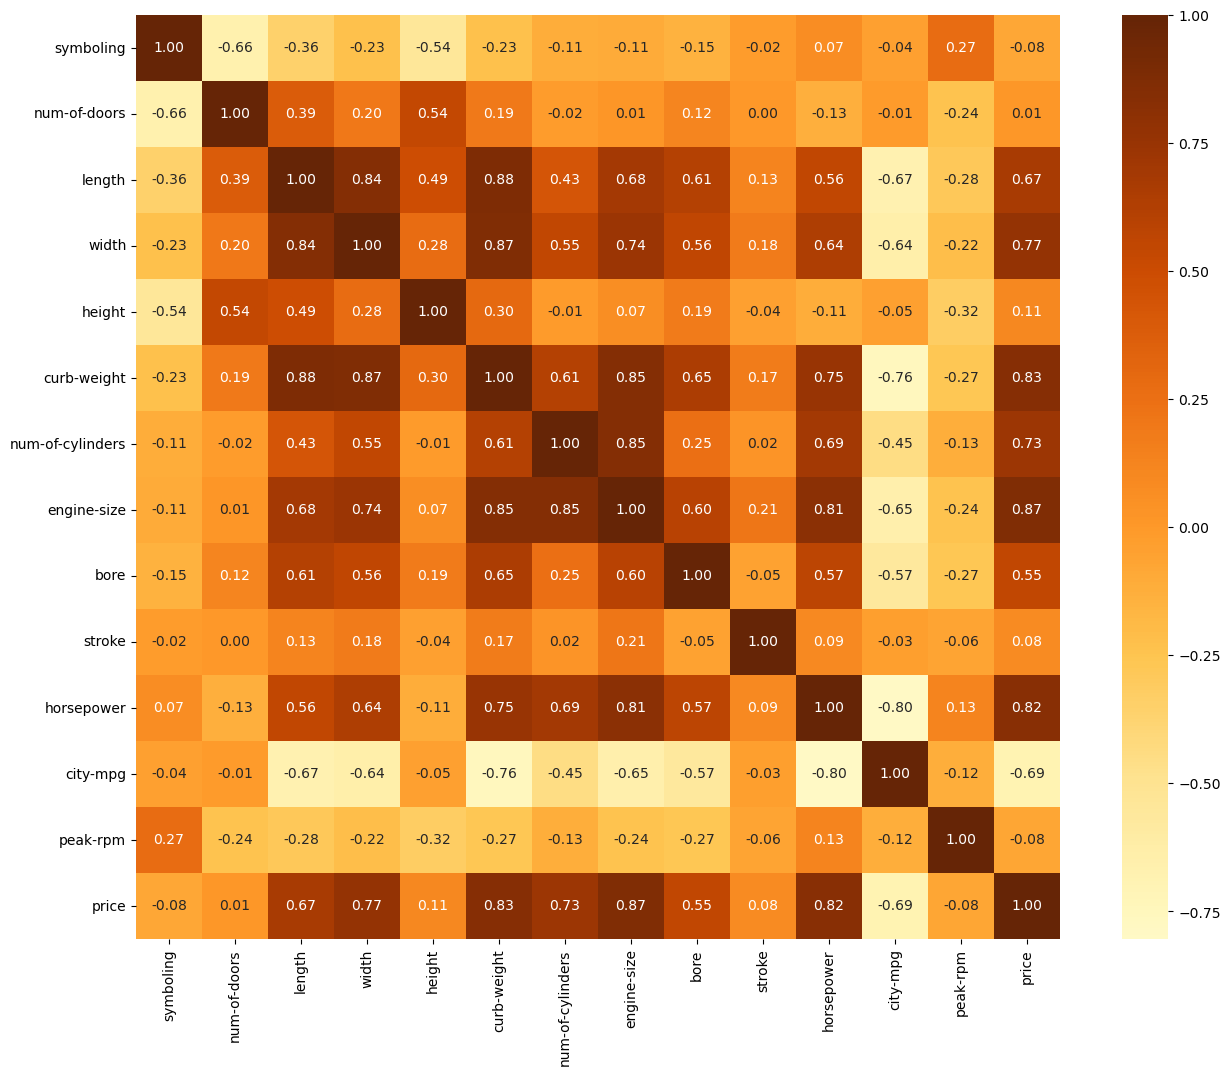

In [28]:
df2 = df[["symboling", "num-of-doors", "length", "width", "height", "curb-weight", "num-of-cylinders","engine-size", "bore", "stroke", "horsepower", "city-mpg", "peak-rpm", "price"]]
df3 = df2.corr()
plt.figure(figsize=(16,12))
#cmap = sns.color_palette("Greens", as_cmap=True)
cmap = sns.color_palette("YlOrBr", as_cmap=True)
h1 = sns.heatmap(df3, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:xlabel='price', ylabel='horsepower'>

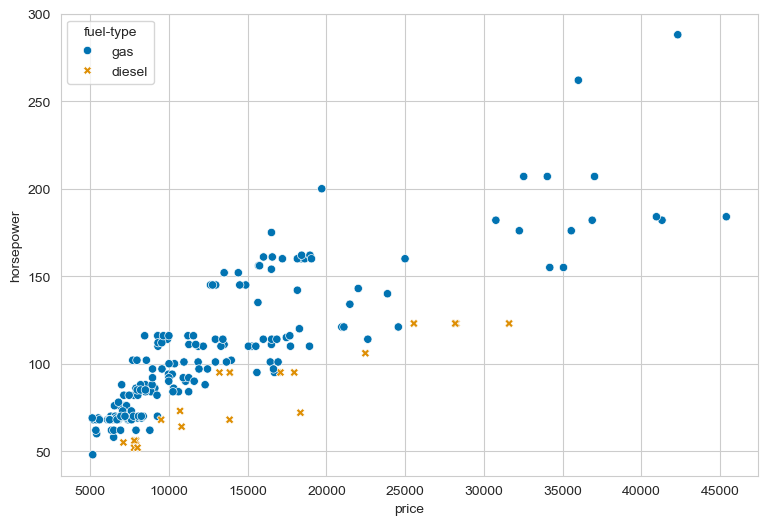

In [29]:
sns.set_style("whitegrid")  
sns.set_palette("colorblind")
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x="price", y="horsepower", hue="fuel-type", style="fuel-type")

<AxesSubplot:xlabel='price', ylabel='width'>

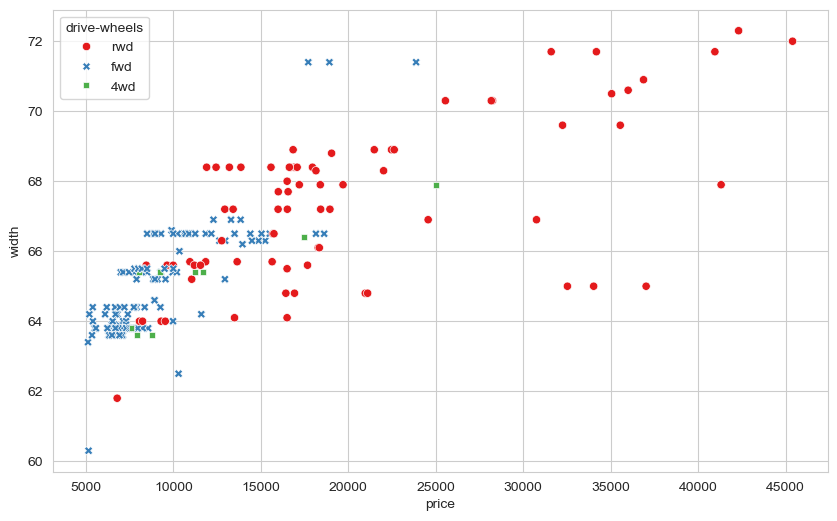

In [30]:
sns.set_palette("Set1")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="price", y="width", hue="drive-wheels", style="drive-wheels")

In [31]:
# Кореляція Пірсона
from scipy.stats import pearsonr
corr_results = pd.DataFrame(index=df2.columns, columns=df2.columns, dtype=bool)
for i in df2.columns:
    for j in df2.columns:
        if i != j:  
            correlation, p_value = pearsonr(df2[i], df2[j])            
            # Встановлюємо значення в залежності від p-значення
            if p_value < 0.001:
                corr_results.at[i, j] = "High"
            elif p_value < 0.05:
                corr_results.at[i, j] = "Medium"
            elif p_value < 0.1:
                corr_results.at[i, j] = "Low"
            else:
                corr_results.at[i, j] = "Null"
for i in df2.columns:
    corr_results.at[i, i] = ""
corr_results

,symboling,num-of-doors,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,horsepower,city-mpg,peak-rpm,price
symboling,,High,High,High,High,Medium,Null,Null,Medium,Null,Null,Null,High,Null
num-of-doors,High,,High,Medium,High,Medium,Null,Null,Low,Null,Low,Null,High,Null
length,High,High,,High,High,High,High,High,High,Low,High,High,High,High
width,High,Medium,High,,High,High,High,High,High,Medium,High,High,Medium,High
height,High,High,High,High,,High,Null,Null,Medium,Null,Null,Null,High,Null
curb-weight,Medium,Medium,High,High,High,,High,High,High,Medium,High,High,High,High
num-of-cylinders,Null,Null,High,High,Null,High,,High,High,Null,High,High,Low,High
engine-size,Null,Null,High,High,Null,High,High,,High,Medium,High,High,High,High
bore,Medium,Low,High,High,Medium,High,High,High,,Null,High,High,High,High
stroke,Null,Null,Low,Medium,Null,Medium,Null,Medium,Null,,Null,Null,Null,Null


In [32]:
# ANOVA Test
from scipy.stats import f_oneway
m1 = df[df['make'] == 'toyota']['price']
m2 = df[df['make'] == 'nissan']['price']
m3 = df[df['make'] == 'mazda']['price']
m4 = df[df['make'] == 'mitsubishi']['price']
m5 = df[df['make'] == 'honda']['price']
m6 = df[df['make'] == 'volkswagen']['price']
m7 = df[df['make'] == 'subaru']['price']
m8 = df[df['make'] == 'peugot']['price']
m9 = df[df['make'] == 'volvo']['price']
m10 = df[df['make'] == 'dodge']['price']
m11 = df[df['make'] == 'mercedes-benz']['price']
m12 = df[df['make'] == 'bmw']['price']
f_statistic, p_value = f_oneway(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)
print("ANOVA F-статистика:", f_statistic)
print("p-значення:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Є статистично значущі різниці між середніми значеннями груп.")
else:
    print("Немає статистично значущих різниць між середніми значеннями груп.")

ANOVA F-статистика: 40.330432123407064
p-значення: 1.474334173256843e-39
Є статистично значущі різниці між середніми значеннями груп.


In [36]:
# Хі-квадрат тест
from scipy.stats import chi2_contingency
top_14 = df['make'].value_counts().nlargest(14).index
chi2_results = pd.DataFrame(index=top_14, columns=['p-value'], dtype=bool)

for brand in top_14:    
    contingency_table = pd.crosstab(df['make'] == brand, df['price'] > df['price'].median())      
    _, p_value, _, _ = chi2_contingency(contingency_table)   
    chi2_results.at[brand, 'p-value'] = p_value < 0.05  # True, якщо різниця статистично значуща

chi2_results

,p-value
toyota,True
nissan,False
mazda,False
mitsubishi,False
honda,True
volkswagen,False
subaru,True
peugot,True
volvo,True
dodge,True
